# 0. 데이터 로드하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# train_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_train.csv')
# test_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_test.csv')

# train = pd.read_csv('/content/drive/MyDrive/school/DataScience/loan_train.csv')
# test = pd.read_csv('/content/drive/MyDrive/school/DataScience/loan_test.csv')

# 진지원용
train = pd.read_csv('/content/drive/MyDrive/train_loan.csv')
test = pd.read_csv('/content/drive/MyDrive/test_loan.csv')

In [ ]:
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,57890399,14986,6848,14215.834900,58,BAT1766061,17.841656,A,G5,MORTGAGE,...,5.460927,0.692790,0,JOINT,159,0,41,16762,6137,0
1,14627222,25795,5588,10972.781160,58,BAT4694572,11.655297,B,C1,MORTGAGE,...,1.390781,1.415970,0,INDIVIDUAL,141,0,21,411722,8417,0
2,63209318,4200,16786,7370.911374,59,BAT1104812,10.499741,B,B4,RENT,...,4.888484,1.410109,0,INDIVIDUAL,152,0,20,70438,6932,0
3,5295524,17148,21912,4840.020550,59,BAT4722912,14.274406,E,B3,OWN,...,0.842342,0.693088,0,INDIVIDUAL,145,0,17,414692,19552,0
4,27540920,20848,11668,13408.689070,59,BAT1104812,10.343987,C,D4,MORTGAGE,...,2.834972,0.667659,0,INDIVIDUAL,106,0,49,49760,34135,0


In [ ]:
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

여기서 Unnamed : 0 과 ID는 고윳값이므로 모두 삭제해주자.

In [ ]:
train = train_raw.drop(['Unnamed: 0', 'ID'], axis=1)
test = test_raw.drop(['Unnamed: 0', 'ID'], axis=1)

# 진지원용
# train = train.drop(['ID'], axis=1)
# test = test.drop(['ID'], axis=1)

In [ ]:
print(train.shape)
print(test.shape)

(47224, 34)
(20239, 33)


In [ ]:
train.describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,...,47224.000000,47224.000000,47224.000000,47224.000000,47224.000000,47224.0,47224.000000,4.722400e+04,47224.000000,47224.000000
mean,16842.147023,15757.808593,14627.119843,58.167775,11.865266,80509.772500,23.259671,0.326931,0.145477,14.260736,...,1.160839,59.577048,1.122379,0.021536,71.139738,0.0,142.844253,1.602618e+05,23082.288963,0.092220
std,8361.875310,8144.238979,6773.434634,3.351086,3.713236,44998.317649,8.453230,0.802257,0.472270,6.215164,...,5.287202,357.158521,3.446596,0.145163,43.262861,0.0,714.093398,1.393696e+05,20871.011881,0.289339
min,1014.000000,1014.000000,1129.708853,36.000000,5.320159,14573.537170,0.675299,0.000000,0.000000,2.000000,...,0.000004,0.000190,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,10004.000000,9270.750000,9841.754930,58.000000,9.326780,51590.807850,16.717303,0.000000,0.000000,10.000000,...,0.021082,1.639534,0.476460,0.000000,35.000000,0.0,24.000000,5.043925e+04,8172.000000,0.000000
50%,16065.500000,13020.500000,12827.552670,59.000000,11.389949,69334.966340,22.570085,0.000000,0.000000,13.000000,...,0.043259,3.359693,0.777921,0.000000,68.000000,0.0,35.000000,1.194040e+05,16693.000000,0.000000
75%,22090.000000,21784.000000,17787.776040,59.000000,14.217990,94519.457875,29.983267,0.000000,0.000000,16.000000,...,0.071965,5.462877,1.069104,0.000000,104.000000,0.0,46.000000,2.292718e+05,32033.750000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.070004,406561.536400,39.629862,8.000000,4.000000,37.000000,...,42.618882,4354.467519,50.847053,1.000000,161.000000,0.0,16421.000000,1.177412e+06,197112.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47224 entries, 0 to 47223
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   47224 non-null  int64  
 1   Funded Amount                 47224 non-null  int64  
 2   Funded Amount Investor        47224 non-null  float64
 3   Term                          47224 non-null  int64  
 4   Batch Enrolled                47224 non-null  object 
 5   Interest Rate                 47224 non-null  float64
 6   Grade                         47224 non-null  object 
 7   Sub Grade                     47224 non-null  object 
 8   Employment Duration           47224 non-null  object 
 9   Home Ownership                47224 non-null  float64
 10  Verification Status           47224 non-null  object 
 11  Payment Plan                  47224 non-null  object 
 12  Loan Title                    47224 non-null  object 
 13  D

# 1. Feature 확인하고 처리하기

Loan Title을 확인해보자

In [ ]:
print(train['Loan Title'].nunique())
print(train['Loan Title'].value_counts())

109
Credit card refinancing    21562
Debt consolidation         17354
Debt Consolidation          2475
Other                       1708
Home improvement            1532
                           ...  
bills                          4
Personal loan                  3
CC                             2
Getting Ahead                  2
Credit                         2
Name: Loan Title, Length: 109, dtype: int64


In [ ]:
train['Loan Title'].unique()

array(['Credit card refinancing', 'Debt consolidation',
       'Credit card refinance', 'Credit Card Consolidation',
       'Debt Consolidation', 'Home improvement', 'Consolidation', 'Other',
       'relief', 'debt consolidation loan', 'Major purchase', 'Loan',
       'credit card refinance', 'Medical', 'Pool', 'Vacation',
       'CC consolidation', 'Medical expenses', 'Moving and relocation',
       'payoff', 'Personal Loan', 'debt consolidation', 'Debt Loan',
       'House', 'consolidation loan', 'consolidate', 'Credit payoff',
       'Bathroom', 'Green loan', 'Debt Payoff', 'Consolidate', 'Business',
       'Lending Club', 'Refinance', 'Home Improvement',
       'Credit card payoff', 'Credit Card Payoff',
       'Debt Consolidation Loan', 'MYLOAN', 'Car financing',
       'Home buying', 'Home loan', 'Freedom', 'Credit Cards',
       'Credit Card Loan', 'Credit Card Debt', 'Dept consolidation',
       'refi', 'CONSOLIDATE', 'Getting Ahead', 'Car Loan', 'personal',
       'Pay Off', '

Credit card payoff와 Credit Card Payoff는 같지만 대소문자를 구별하여 다른 클래스로 분류되었다. 이러한 것들을 처리해주자

In [ ]:
def concat_col(x):
  return x.lower()

train['Loan Title'] = train['Loan Title'].apply(concat_col)
test['Loan Title'] = test['Loan Title'].apply(concat_col)

In [ ]:
train['Loan Title'].nunique()

83

109개에서 83개까지 줄었다.

In [ ]:
cate_train = [i for i in train.select_dtypes(include='object').columns]
cate_test = [i for i in test.select_dtypes(include='object').columns]

In [ ]:
train[cate_train].nunique()

Batch Enrolled         41
Grade                   7
Sub Grade              35
Employment Duration     3
Verification Status     3
Payment Plan            1
Loan Title             83
Initial List Status     2
Application Type        2
dtype: int64

In [ ]:
# 데이터 프레임에서 Grade와 Sub Grade 열 가져오기
grades = train['Grade']
sub_grades = train['Sub Grade']

# 첫 글자가 일치하지 않는 데이터 개수 카운트
count = sum(1 for grade, sub_grade in zip(grades, sub_grades) if grade[0] != sub_grade[0])

print("첫 글자가 일치하지 않는 데이터의 개수:", count)

첫 글자가 일치하지 않는 데이터의 개수: 37398


보통 은행사는 Sub Grade의 첫 알파벳과 Grade가 같다. 이 데이터는 그렇지 않으므로, 두 column을 병합하기에는 힘들어 보입니다.

# 2. 결측치 및 중복값 제거하기

In [ ]:
# 중복값 확인
print(train.duplicated().sum())

# 결측치 확인
print(train.isnull().sum().sum())

0
0


모두 없다.

# 3. 이상치 확인하기

이상치를 확인하기 전에, 우선 target 데이터의 분포를 확인하자

In [ ]:
train['Loan Status'].value_counts()
zero = len(train[train['Loan Status'] == 0]) / len(train) * 100
one = 100 - zero
print('{}% of values are 0 \n {}% values are 1'.format(round(zero, 2), round(one, 2)))

90.78% of values are 0 
 9.22% values are 1


target 데이터가 상당히 편향되어 있음을 알 수 있다.

In [ ]:
train.dtypes.value_counts()

int64      16
float64     9
object      9
dtype: int64

In [ ]:
train.nunique()

Loan Amount                     23997
Funded Amount                   21452
Funded Amount Investor          47209
Term                                3
Batch Enrolled                     41
Interest Rate                   47218
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  47219
Verification Status                 3
Payment Plan                        1
Loan Title                         83
Debit to Income                 47219
Delinquency - two years             9
Inquires - six months               5
Open Account                       36
Public Record                       5
Revolving Balance               18031
Revolving Utilities             47222
Total Accounts                     69
Initial List Status                 2
Total Received Interest         47219
Total Received Late Fee         47190
Recoveries                      47183
Collection Recovery Fee         47148
Collection 1

nunique의 값이 1인 경우는 의미 없는 feature이므로 삭제해줍니다.

In [ ]:
# 값이 unique한 것이 하나만 있는 feature는 삭제해준다.
train.drop(['Accounts Delinquent', 'Payment Plan'], 1, inplace=True)
test.drop(['Accounts Delinquent','Payment Plan'], 1, inplace=True)

#### 3-1. Numeric Type outlier Detection

In [ ]:
# numeric type과 object type의 데이터를 나눠주겠습니다.
num_train = [i for i in train.select_dtypes(exclude='object').columns]
num_test = [i for i in test.select_dtypes(exclude='object').columns]

In [ ]:
def find_outliers_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers

def detect_outliers(df):
    cols = []
    outliers = []
    for col in df.select_dtypes(include=['int', 'float']):
        outlier = find_outliers_IQR(df[col])
        if(len(outlier) != 0):
          print(col,'에서의 outlier의 개수: ',len(outlier))
          cols.append(col)
          outliers.append(outlier)

    return cols, outliers

In [ ]:
cols, outliers = detect_outliers(train)

Funded Amount Investor 에서의 outlier의 개수:  2175
Term 에서의 outlier의 개수:  1035
Interest Rate 에서의 outlier의 개수:  593
Home Ownership 에서의 outlier의 개수:  2864
Delinquency - two years 에서의 outlier의 개수:  10750
Inquires - six months 에서의 outlier의 개수:  4882
Open Account 에서의 outlier의 개수:  3921
Public Record 에서의 outlier의 개수:  3228
Revolving Balance 에서의 outlier의 개수:  2584
Total Accounts 에서의 outlier의 개수:  1001
Total Received Interest 에서의 outlier의 개수:  3502
Total Received Late Fee 에서의 outlier의 개수:  2404
Recoveries 에서의 outlier의 개수:  1605
Collection Recovery Fee 에서의 outlier의 개수:  561
Collection 12 months Medical 에서의 outlier의 개수:  1017
Total Collection Amount 에서의 outlier의 개수:  3329
Total Current Balance 에서의 outlier의 개수:  1415
Total Revolving Credit Limit 에서의 outlier의 개수:  1885
Loan Status 에서의 outlier의 개수:  4355


In [ ]:
def merge_arrays(arrays):
  merged_array = []
  for array in arrays:
    merged_array.extend(array)

  merged_array = list(set(merged_array))  # 중복 제거

  return merged_array

res_outlier = merge_arrays(outliers)

In [ ]:
len(res_outlier)

32379

통계적 기법으로 구한 이상치는 너무 값이 많아 실질적으로 처리하기는 어려워보인다.

In [ ]:
from sklearn.ensemble import IsolationForest

# Isolation Forest 모델 생성
model = IsolationForest(contamination=0.1)  # 이상치 비율을 설정합니다.

# 모델 학습
model.fit(train[num_train])

# 이상치 탐지
outlier_scores = model.decision_function(train[num_train])
outliers = outlier_scores < 0

# 이상치 출력
print("이상치 개수:", sum(outliers))
print("이상치 인덱스:", np.where(outliers)[0])

이상치 개수: 4723
이상치 인덱스: [    3    26    27 ... 47207 47214 47220]


numeric type의 이상치를 제거하자

In [ ]:
# 이상치 인덱스를 삭제
train.drop(np.where(outliers)[0])
train = train.reset_index(drop=True)

### 3-2. Categorical Type Outlier Detection

In [ ]:
cate_train = [i for i in train.select_dtypes(include='object').columns]
cate_test = [i for i in test.select_dtypes(include='object').columns]
train[cate_train].nunique()

Batch Enrolled         41
Grade                   7
Sub Grade              35
Employment Duration     3
Verification Status     3
Loan Title             83
Initial List Status     2
Application Type        2
dtype: int64

음.. 보면 값이 많은 Batch Enrolled, Sub Grade, Loan Title만 진행해주면 될 듯 하다.

In [ ]:
be_df = pd.DataFrame(train['Batch Enrolled'].value_counts())
loc = find_outliers_IQR(be_df['Batch Enrolled'])

In [ ]:
be_df.iloc[loc]

,Batch Enrolled
BAT3873588,2549


이상치 범위에 크게 벗어나지는 않는데 지워야할까..?

In [ ]:
sg_df = pd.DataFrame(train['Sub Grade'].value_counts())
loc = find_outliers_IQR(sg_df['Sub Grade'])

In [ ]:
sg_df.iloc[loc]

,Sub Grade


Sub Grade는 없다

In [ ]:
lt_df = pd.DataFrame(train['Loan Title'].value_counts())
loc = find_outliers_IQR(lt_df['Loan Title'])

In [ ]:
lt_df.iloc[loc]

,Loan Title
credit card refinancing,21562
debt consolidation,19932
other,1708
home improvement,1588
major purchase,349
medical expenses,164
business,134
consolidation,111
moving and relocation,107
car financing,98


우선 골라내기는 했는데.. 삭제해야할까요..?

# 4. 상관계수 확인하기

<Axes: >

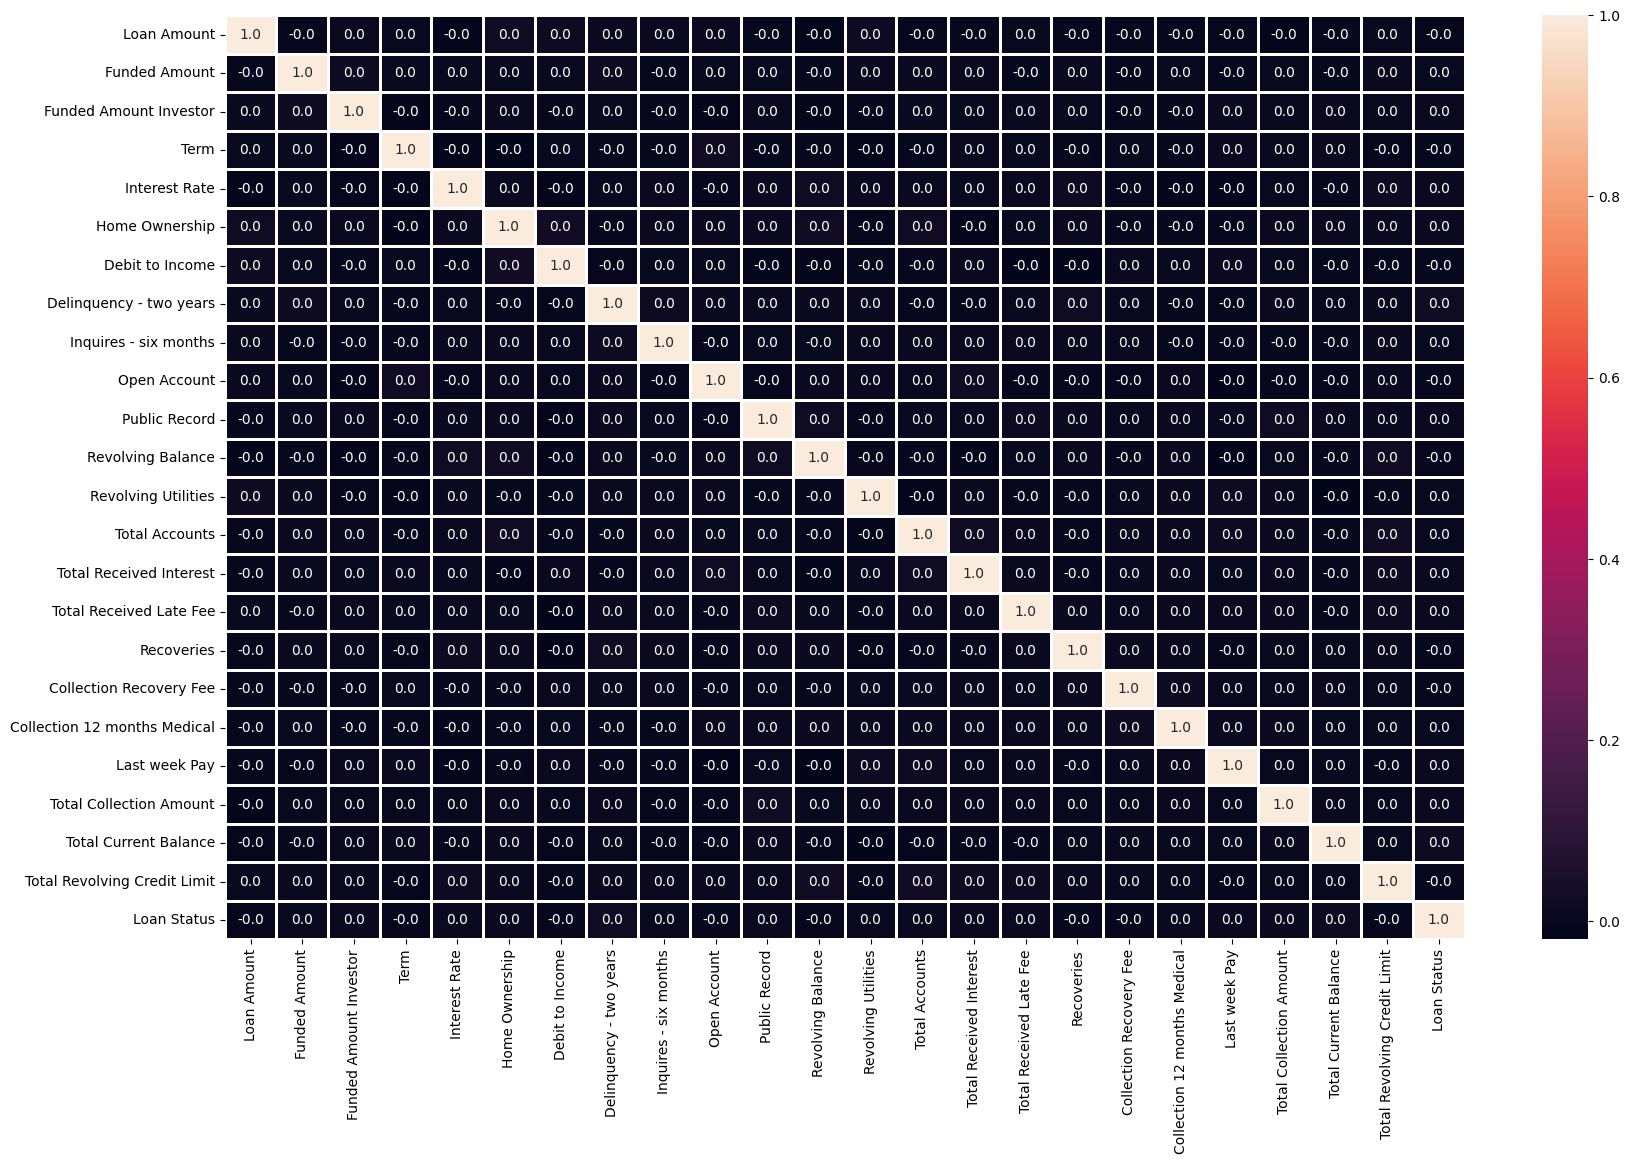

In [ ]:
import seaborn as sns

# 수치데이터에서 중요한 feature를 분석하고 선택합니다.
corr = train.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, linewidths=1, fmt='.1f')

모든 feature가 독립적이다.

# 5. Feature Importance
우선 Objective type의 feature를 Label Encoding을 통해 Numeric type으로 변경해줍니다.
그 후에 RandomForest를 통해서 feature importance를 계산합니다


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_tmp = train
train_test = test

for feature in cate_train:
  train_tmp[feature] = label_encoder.fit_transform(train[feature])
  train_test[feature] = label_encoder.fit_transform(test[feature])

In [ ]:
# Random Forest 모델 기준 Feature Importances 계산
from sklearn.ensemble import RandomForestClassifier

X_train = train_tmp.drop('Loan Status', axis = 1)
Y_train = train['Loan Status']

rf = RandomForestClassifier(random_state = 42, n_jobs = -1)
rf_model = rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features': X_train.columns, 'Feature Importances': rf_model.feature_importances_})
importances.sort_values(by='Feature Importances', ascending = False)

,Features,Feature Importances
9,Home Ownership,0.050551
22,Total Received Late Fee,0.050067
0,Loan Amount,0.049631
29,Total Current Balance,0.049386
2,Funded Amount Investor,0.049049
5,Interest Rate,0.049022
24,Collection Recovery Fee,0.048832
23,Recoveries,0.048314
21,Total Received Interest,0.048224
1,Funded Amount,0.048191


중요도가 낮은 Collection 12 months Medical과 Application Type을 삭제하자

In [ ]:
sort_import = importances.sort_values(by='Feature Importances', ascending = False)
del_list = list(sort_import[sort_import['Feature Importances'] < 0.01]['Features'])

In [ ]:
train = train.drop(del_list, axis=1)
test = test.drop(del_list, axis=1)

# 5. 범주형 변수 인코딩하기

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# OrdinalEncoder 객체 생성
encoder = OrdinalEncoder()

# 데이터 변환
train['Grade'] = encoder.fit_transform(train[['Grade']])
train['Sub Grade'] = encoder.fit_transform(train[['Sub Grade']])

test['Grade'] = encoder.fit_transform(test[['Grade']])
test['Sub Grade'] = encoder.fit_transform(test[['Sub Grade']])

print(train['Grade'].unique())
print(train['Sub Grade'].unique())

[0. 1. 4. 2. 5. 3. 6.]
[34. 10.  8.  7. 18.  6. 29.  4. 19. 15.  0. 14.  2. 12. 23.  1. 27.  5.
 16.  9. 22. 17. 11. 25. 26. 13.  3. 20. 21. 24. 32. 31. 30. 33. 28.]


In [ ]:
# 남은 category 변수들을 인코딩 해줍니다.
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(47224, 25)
(20239, 24)


# 6. 데이터 불균형 처리하기

In [ ]:
# SMOTE + TomekLinks
from imblearn.combine import SMOTETomek

x_train = train.drop('Loan Status', axis = 1)
y_train = train['Loan Status']

X_st, y_st = SMOTETomek(random_state=4).fit_resample(x_train, y_train)

# 오버샘플링 후의 데이터 확인
print("Original data shape:", x_train.shape, y_train.shape)
print("Resampled data shape:", X_st.shape, y_st.shape)

Original data shape: (47224, 24) (47224,)
Resampled data shape: (85288, 24) (85288,)


#7. 모델링
모델을 F1 score로 평가
(데이터가 불균형일 때 대다수를 차지하는 데이터로 모두 예측해버리면 정확도는 높게 평가될 수 있으므로 F1 score를 평가 기준으로 사용), 
f1 score가 높은 상위 3개 모델을 voting. 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [46]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_st, y_st, test_size=0.2, random_state = 42, stratify = y_st)
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((68230, 24), (68230,), (17058, 24), (17058,))

In [ ]:
# Logistic regression

params = { 
          'penalty': ['l1', 'l2'], 
          'C': [0.01, 0.1, 1, 5, 10]
}

lr = LogisticRegression()
# scoring default = "accuracy"
lr_grid = GridSearchCV(lr, param_grid = params, scoring = 'f1', cv = 5)
lr_grid.fit(X_train, Y_train)
print(lr_grid.best_params_)

lr_model = lr_grid.best_estimator_
Y_pred = lr_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_log = accuracy_score(Y_pred, Y_valid)
f1_log = f1_score(Y_pred,Y_valid)   # f1 score로 평가하기로 했으니까 f1 스코어도 계산했어요 !
print(f1_log)
print(accuracy_log)

{'C': 1, 'penalty': 'l2'}
0.4866110349981317
0.516707703130496


In [ ]:
# Decision tree

params = {
    'max_depth':[1,2,3], 
    'min_samples_split':[2,3]
}

dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(dt, param_grid = params, scoring = 'f1', cv = 5)
dt_grid.fit(X_train, Y_train)
print(dt_grid.best_params_)

dt_model = dt_grid.best_estimator_
Y_pred  = dt_model.predict(X_valid)

# Measuring accuracy on Testing Data
acc_decision_tree = accuracy_score(Y_pred, Y_valid)
f1_dt = f1_score(Y_pred,Y_valid)
print(f1_dt)
print(acc_decision_tree)

{'max_depth': 3, 'min_samples_split': 2}
0.716195856873823
0.6466174229100715


In [ ]:
# KNN

params = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, param_grid = params, scoring = 'f1', cv = 5)
knn_grid.fit(X_train,  Y_train)
print(knn_grid.best_params_)

knn_model = knn_grid.best_estimator_
Y_pred = knn_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_knn = accuracy_score(Y_pred, Y_valid)
f1_knn = f1_score(Y_pred,Y_valid)
print(f1_knn)
print(accuracy_knn)

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.9098141790638112
0.9029780748036113


In [ ]:
# Support Vector Machines

# params = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
# }

# svc = SVC()

# svc_grid = GridSearchCV(svc, param_grid = params, scoring = 'f1', cv = 5)
# svc_grid.fit(X_train, Y_train)
# svc_model = svc_grid.best_estimator_
# Y_pred = svc_model.predict(X_valid)

# # Measuring accuracy on Testing Data
# accuracy_svc = accuracy_score(Y_pred, Y_valid)
# f1_svc = f1_score(Y_pred,Y_valid)
# print(f1_svc)
# print(accuracy_svc)

In [ ]:
# Gaussian Naive Bayes

params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gaussian = GaussianNB()

gaussian_grid = GridSearchCV(gaussian, param_grid = params, scoring = 'f1', cv = 5)
gaussian_grid.fit(X_train, Y_train)
print(gaussian_grid.best_params_)

gaussian_model = gaussian_grid.best_estimator_
Y_pred = gaussian_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_gaussian = accuracy_score(Y_pred, Y_valid)
f1_gaussian = f1_score(Y_pred,Y_valid)
print(f1_gaussian)
print(accuracy_gaussian)

{'var_smoothing': 1e-09}
0.6684660780456563
0.5751553523273537


In [ ]:
# Gradient boosting

params  = {
    'learning_rate': [0.001, 0.01, 0.1, 1, 3, 5],
    'n_estimators': [30, 50, 100, 200]
}

g_boost = GradientBoostingClassifier()

g_boost_grid = GridSearchCV(g_boost, param_grid = params, scoring = 'f1', cv = 5)
g_boost_grid.fit(X_train, Y_train)
print(g_boost_grid.best_params_)

g_boost_model = g_boost_grid.best_estimator_
Y_pred = g_boost_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_gboost = accuracy_score(Y_pred, Y_valid)
f1_gboost = f1_score(Y_pred,Y_valid)
print(f1_gboost)
print(accuracy_gboost)

{'learning_rate': 1, 'n_estimators': 100}
0.9311935067330751
0.9344002813928949


In [47]:
# XGB Classifier

params = {
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1, 0.2],
        'n_estimators': [100]
}

xgb_classifier = XGBClassifier()

xgb_grid = GridSearchCV(xgb_classifier, param_grid = params, scoring = 'f1', cv = 5)
xgb_grid.fit(X_train,Y_train)
print(xgb_grid.best_params_)

xgb_model = xgb_grid.best_estimator_
Y_pred = xgb_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_xgb = accuracy_score(Y_pred, Y_valid)
f1_xgb = f1_score(Y_pred,Y_valid)
print(f1_xgb)
print(accuracy_xgb)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
0.9345108526649667
0.9382694336967992


In [48]:
# Random Forest

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10],
    'min_samples_leaf' : [8, 12, 16],
    'min_samples_split' : [8, 16, 20]
}

rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

rf_grid = GridSearchCV(rf, param_grid = params, scoring = 'f1', cv = 5)
rf_grid.fit(X_train, Y_train)
print(rf_grid.best_params_)

rf_model = rf_grid.best_estimator_
Y_pred = rf_model.predict(X_valid)

# Measuring accuracy on Testing Data
accuracy_rf = accuracy_score(Y_pred, Y_valid)
f1_rf = f1_score(Y_pred,Y_valid)
print(f1_rf)
print(accuracy_rf)

{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
0.8132848257246802
0.8134599601360065


In [49]:
f1_log = 0.4866110349981317
accuracy_log = 0.516707703130496

f1_dt = 0.716195856873823
acc_decision_tree = 0.6466174229100715

f1_knn = 0.9098141790638112
accuracy_knn = 0.9029780748036113

f1_gaussian = 0.6684660780456563
accuracy_gaussian = 0.5751553523273537

f1_gboost = 0.9311935067330751
accuracy_gboost = 0.9344002813928949

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest',
              'Naive Bayes', 'Decision Tree', 'Gradient Boosting', 'XGB Classifier'],
    'Accuracy': [accuracy_knn, accuracy_log, accuracy_rf,
              accuracy_gaussian, acc_decision_tree, accuracy_gboost, accuracy_xgb],
    'F1 score': [f1_knn, f1_log, f1_rf, f1_gaussian, f1_dt, f1_gboost, f1_xgb]})
models.sort_values(by='F1 score', ascending=False)

,Model,Accuracy,F1 score
6,XGB Classifier,0.938269,0.934511
5,Gradient Boosting,0.934400,0.931194
0,KNN,0.902978,0.909814
2,Random Forest,0.813460,0.813285
4,Decision Tree,0.646617,0.716196
3,Naive Bayes,0.575155,0.668466
1,Logistic Regression,0.516708,0.486611


* 상위 3개 방법으로 보팅할까요? 


In [51]:
from sklearn.ensemble import VotingClassifier

xgb= XGBClassifier(learning_rate = 0.2, max_depth = 5, n_estimators= 100)
gb = GradientBoostingClassifier(learning_rate = 1, n_estimators = 100)
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 2, weights = 'uniform')

votingC = VotingClassifier(estimators=[('xgboosting', xgb), ('Gradient Boosting', gb), ('Knn', knn), ],
                           voting='soft',
                           n_jobs=-1)

votingC.fit(X_train, Y_train)

Y_pred = votingC.predict(X_valid)
accuracy_voting = accuracy_score(Y_pred, Y_valid)
f1_voting = f1_score(Y_pred,Y_valid)
print(accuracy_voting)
print(f1_voting)

predictions = votingC.predict(test)

0.9432524328760699
0.9407371127709072


In [59]:
output = pd.read_csv('/content/drive/MyDrive/loan_sample_submission.csv')
output['Loan Status'] = predictions
output.to_csv('/content/drive/MyDrive/submission.csv', index = False)